<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/ML_08_DecisionTree_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree

In [ ]:
"""
Decision Tree는 학습을 너무 잘해서 과대적합이 일어날 수 있음
"""

- 지도 학습
- 일련의 질문에 근거하여 주어진 데이터를 소집단으로 분류/회귀 분석 기법
- 최적의 질문 찾기
  - 정보이득(Information Gain)이 최대가 되도록
  - 데이터 불순도(Impurity)가 최소가 되도록
  - 데이터 불순도 측정법 : 지니 인덱스(Gini Index), 엔트로피(Entropy)
  - 다른 알고리즘에 비해 시간이 오래 걸림

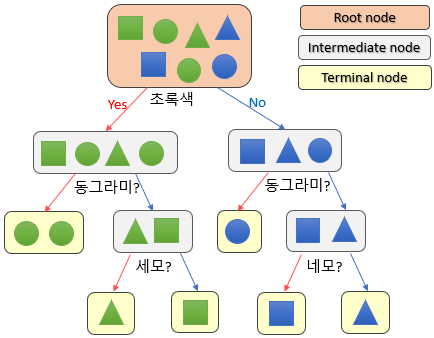

In [ ]:
모양 또는 색 중에서 무엇을 먼저, 어떤 기준으로 나누어야 할까?
=> 불순도가 낮아지는 방향으로 나누어야 한다!
=> 방법으로 ID3, CART, C4.5, C5.0 등이 있다
  - 불순도가 낮은 것부터 질문으로 사용함, 불순도가 높은 경우 많은 정보를 가지고 있어 구분이 어려움

불순도(Impurity)
- 동일하지 않은 것이 섞여 있는 정도
- 불순도를 수치화한 지표 : 엔트로피(Entropy)와 지니계수(GiniIndex)
- ID3 : 불순도 계산에 Entropy를 사용한 알고리즘 
- CART : 불순도 계산에 Gini-Index를 사용한 알고리즘
- ID3 설명 : ```https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98``` 

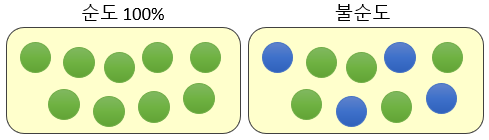

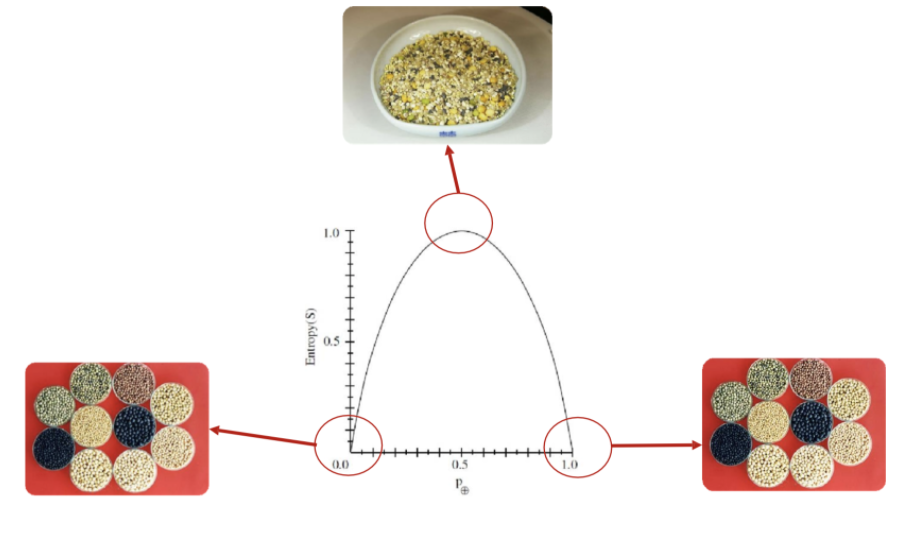

### Decision Tree 예1 - 이상형 고르기 

- 외모, 성격, 건강을 조건으로 이상형을 분류하는 예제
> 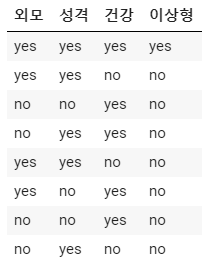


- sklearn.tree.DecisionTreeClassifier(*, criterion, ...)
  - criterion : 'gini'(default), 'entropy'
  - max_depth = None, 트리의 최대 깊이
  - min_sample_split = 2, 노드내에서 분할이 필요한 최소의 샘플 수
  - max_features = None, 최적의 분할을 찾기 위해 고려할 Feature의 수
     - int : Feature의 수, float : 비율, or {'auto', 'sqrt', 'log2'}
  - max_leaf_nodes=None : 최대 말단 노드 개수
  - ```feature_importances_``` : 가장 많은 분류를 만든 속성

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

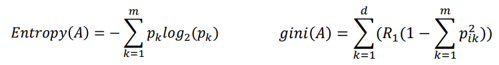

In [1]:
import numpy as np
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]


In [2]:
# Entropy
import numpy as np
def E(pos, neg):
    tot = pos + neg
    TR = pos/tot # positive 확률
    FR = neg/tot # negative 확률
    a = -(TR*np.log2(TR)) if TR != 0 else 0
    b = -(FR*np.log2(FR)) if FR != 0 else 0
    return a + b
a = E(1, 7) #이상형, 이상형 아님
# 불순도를 구함
apperance = ((4/8)*E(1, 3)) + ((4/8)*E(0, 4))
character = ((5/8)*E(1, 4)) + ((3/8)*E(0, 3))
health = ((5/8)*E(1, 4)) + ((3/8)*E(0, 3))
# 불확실성이 가장 많이 감소하는(가장 낮은) apperance를 선택함 
print('%.4f  %.4f %.4f %.4f ' % (a, apperance, character, health))

0.5436  0.4056 0.4512 0.4512 


In [3]:
# Gini
def G(pos, neg):
    if not pos or not neg: return 0
    tot = pos + neg
    return 1 - (pos/tot)**2 - (neg/tot)**2

a = G(1, 7)
apperance = (4/8)*G(4, 0) + (4/8)*G(3, 1)
character = (5/8)*G(4, 1) + (3/8)*G(3, 0)
health = (5/8)*G(4, 1) + (3/8)*G(3, 0)

# 불순도가 가장 낮은 apperence를 선택함 0.1875
print('%.4f, %.4f %.4f %.4f' % (a, apperance, character, health))

0.2188, 0.1875 0.2000 0.2000


In [10]:
##  Deision Tree 이상형(entropy)
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

# 1 : yes, 2 : no
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)
# criterion='entropy', random_state=0사용하여 DecisionTreeClassifier를 생성하고 학습한다, 
tree_ent = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X,y)

# training 정확도를 출력한다
print("Train Accurray: ", tree_ent.score(X, y) )

# X에 대한 예측 결과를 출력한다.
print(tree_ent.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


In [7]:
# feature_importances_ : Tree 계열에서 사용할 수 있는 특성의 중요도 조회 속성
# 분순도를 기반으로 계산되며 정규화되었기 때문에 총합은 1

# 모델의 특성 중요도를 조회한다
for x, y in zip(tree_ent.feature_importances_, ["Appearance", "Character", "Health"]):
    print(y, round(x, 3))

Appearance 0.254
Character 0.46
Health 0.286


In [8]:
# 트리의 max_depth 출력
tree_ent.get_depth()

3

In [11]:
# Decision Tree - 이상형(Gini)

import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

# 1 : yes, 2 : no
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

# criterion = 'gini', random_state=0 (gini ==> default) 사용하여 DecisionTreeClassifier를 생성하고 학습한다, 
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=0).fit(X,y)

# training 정확도를 출력한다
print("Train Accurray: ",  tree_gini.score(X, y) )

# X에 대한 예측 결과를 출력한다.
print(tree_gini.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


In [13]:
# feature_importances_ 를 사용해 모델의 특성 중요도를 조회한다
for x, y in zip(tree_gini.feature_importances_, ["Appearance", "Character", "Health"]):
    print(y, round(x, 3))

Appearance 0.143
Character 0.571
Health 0.286


### Decision Tree 시각화
- pydotplus
    - pip install pydotplus
- grphviz
    - 실행파일 설치 : https://graphviz.gitlab.io/download/
    - windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    - `pip install graphviz`


In [14]:
!pip install pydotplus graphviz

In [ ]:
# export_graphviz의 argument

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기
# impurity : 불순도 표시 (default=True)

In [15]:
# 설치가 되지 않는 경우 
from sklearn.tree import export_graphviz
export_graphviz(tree_ent, out_file='tree_ent.dot',
                feature_names=["Appearance", "Character", "Health"],
                class_names=["No", "Yes"],
                impurity=True, 
                rounded=True,
                filled=True)
# tree_model.dot 시각화 사이트 # http://webgraphviz.com/
# tree_ent.dot 파일을 메모장 등으로 열어서 웹에 복사한다

In [16]:
# 설치가 된 경우 
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.core.display import Image

def showTree(dt, feature_names, class_names):
    dot_data = export_graphviz(dt,
                               out_file=None,
                               feature_names=feature_names,
                               class_names=class_names,                               
                               impurity=True, 
                               rounded=True,
                               filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return Image(graph.create_png())

In [ ]:
# 첫번째 줄 : 분류 기준
# entropy : 엔트로피값
# sample : 분류한 데이터 개수
# value : 클래스별 데이터 개수  # NO, Yes의 개수
# class : 예측한 답

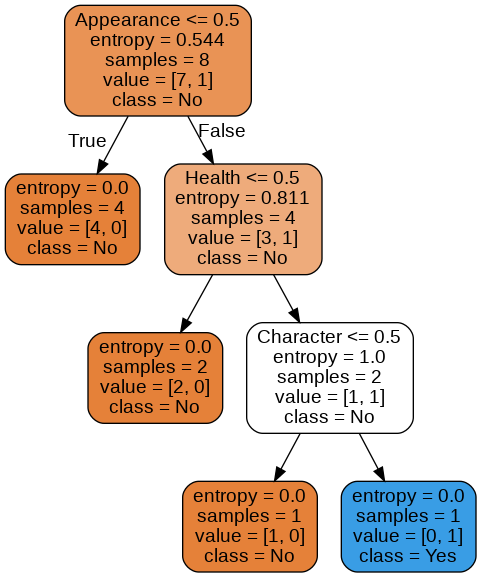

In [17]:
showTree(tree_ent, ["Appearance", "Character", "Health"], ["No", "Yes"])

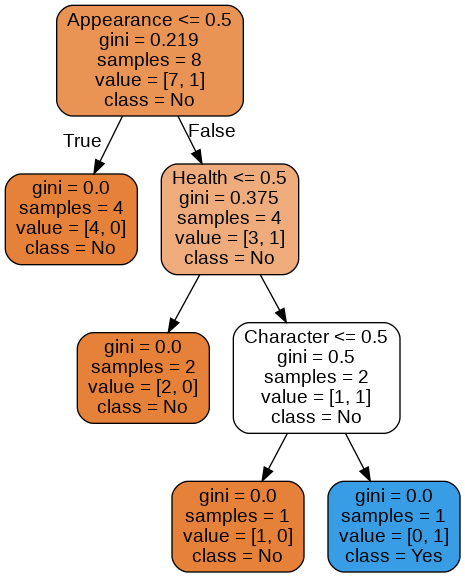

In [18]:
showTree(tree_gini, ["Appearance", "Character", "Health"], ["No", "Yes"])

#### 위스콘신 유방암 진단 (이진 분류)

##### 1. 데이터 준비

In [44]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
# 암 데이터를 가져와 cancer로 이름을 지정한다
cancer = load_breast_cancer()
# 'cancer.csv' 로 저장한다
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df.to_csv('cancer.csv', index=False)

target_names = cancer.target_names
print(target_names)

['malignant' 'benign']


In [45]:
import pandas as pd
# 암 데이터를 가져와 cancer로 이름을 지정한다
cancer = pd.read_csv('cancer.csv')
X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]
X.shape, y.shape

((569, 30), (569,))

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    stratify=y,
                                                    random_state=0)

##### 2. 모델 학습 및 평가
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [47]:
from sklearn.tree import DecisionTreeClassifier # 분류
#from sklearn.tree import DecisionTreeRegressor # 회귀

# train 데이터를 사용해 DecisionTreeClassifier를 모델을 훈련한다, random_state=0 지정
# 모델의 성능을 train, test 각각 확인한다
model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

print(f'train accuracy : {model.score(x_train, y_train)*100:.2f}%')
print(f'test accuracy  : {model.score(x_test, y_test) *100:.2f}%')

train accuracy : 100.00%
test accuracy  : 90.21%


In [48]:
model.get_depth()

5

In [49]:
# feature_importances_ : Tree 계열에서 사용할 수 있는 특성의 중요도 조회 속성
# 분순도를 기반으로 계산되며 정규화되었기 때문에 총합은 1
# 모델의 특성 중요도를 조회한다
model.feature_importances_

array([0.        , 0.02831198, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01101841, 0.        ,
       0.01223453, 0.        , 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.00668975, 0.        , 0.        ,
       0.03687207, 0.03710758, 0.72534081, 0.        , 0.01433518,
       0.        , 0.00401385, 0.10516335, 0.        , 0.00891967])

##### 3. 특성 중요도 시각화


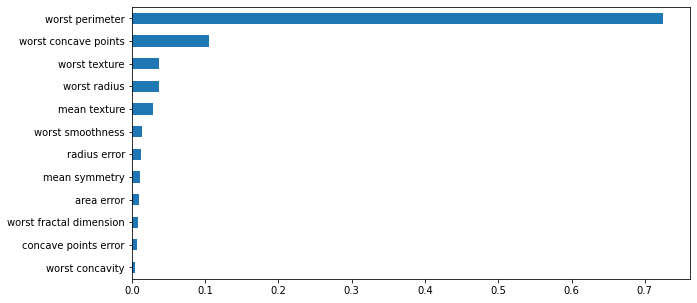

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. 중요도(feature_importances_) 에 대해서 Series를 작성합니다. 
#    이때, Series의 index로 feature_names를 지정합니다.
# 2. Series에서 0이 아닌 값들만 대상으로 정렬하여 barh 종류의 차트를 그립니다
#    Series.plot(kind='barh', figsize=(10, 5))  사용
fi = pd.Series(model.feature_importances_, index=X.columns)
fi[fi!=0].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5))
plt.show()

In [51]:
fi[fi!=0].sort_values(ascending=False)

worst perimeter            0.725341
worst concave points       0.105163
worst texture              0.037108
worst radius               0.036872
mean texture               0.028312
worst smoothness           0.014335
radius error               0.012235
mean symmetry              0.011018
area error                 0.009993
worst fractal dimension    0.008920
concave points error       0.006690
worst concavity            0.004014
dtype: float64

##### 4. 모델 복잡도 제어
- Tree 계열 모델은 쉽게 과대적합되는 경향이 있어 parameter tunning이 매우 중요함
- 가장 쉽고 간단한 방법은 트리가 너무 깊어지지 않도록 트리의 깊이(max_depth)를 제어 하는 것
- 이외에도 leaf 노드의 최소 샘플 수(min_samples_leaf), leaf 노드의 최대수(max_leaf_nodes), 최대 특성 수(max_features), 노드를 분할하기 위한 최소 샘플수(min_samples_split)를 지정

In [52]:
from sklearn.tree import DecisionTreeClassifier

# max_depth=3, random_state=0 으로 지정하여 모델을 생성하고, score를 확인한다.
model3 = DecisionTreeClassifier(max_depth=3, random_state=0).fit(x_train, y_train)
print(f'train accuracy : {model3.score(x_train, y_train)*100:.2f}%')
print(f'test accuracy  : {model3.score(x_test, y_test) *100:.2f}%')

train accuracy : 97.65%
test accuracy  : 91.61%


In [53]:
from sklearn.tree import DecisionTreeClassifier

# max_depth=5, random_state=90 로 지정하여 모델을 생성하고, score를 확인한다.
model5 = DecisionTreeClassifier(max_depth=5, random_state=0).fit(x_train, y_train)
print(f'train accuracy : {model5.score(x_train, y_train)*100:.2f}%')
print(f'test accuracy  : {model5.score(x_test, y_test) *100:.2f}%')

train accuracy : 100.00%
test accuracy  : 90.21%


##### 5. Graphviz 설치, Rule 뽑기¶

In [54]:
!pip install graphviz

In [55]:
from sklearn.tree import export_graphviz
export_graphviz(model3, out_file='model3.dot',
                feature_names=X.columns,
                class_names=target_names,
                impurity=True, 
                filled=True)
# tree_model.dot 시각화 사이트# http://webgraphviz.com/
# model3.dot 파일을 메모장 등으로 열어서 웹에 복사한다

In [56]:
s = pd.Series(target_names[y_train]).value_counts()
display(s, s.sum())

benign       267
malignant    159
dtype: int64

426

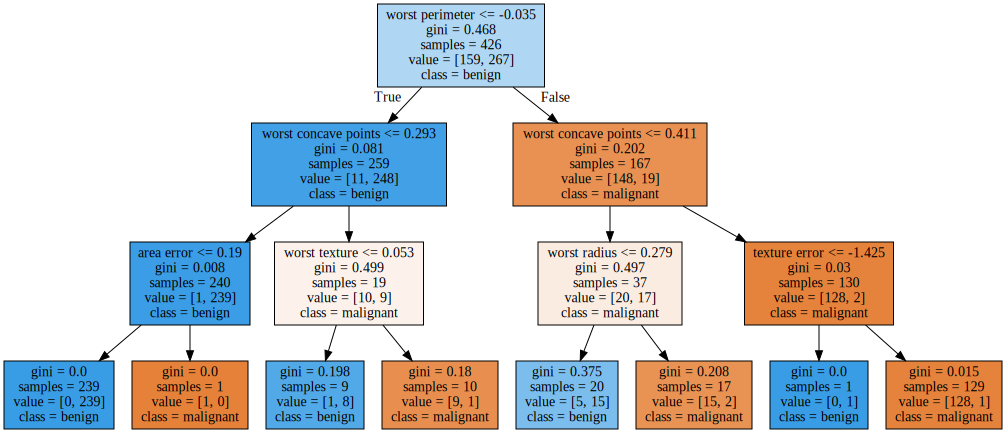

In [57]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

In [58]:
# model3의 예측값을 5개 출력한다
model3.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

In [59]:
# model3의 예측 확률 (predict_proba)를 5개 출력한다
model3.predict_proba(x_test)[:5]

array([[0.        , 1.        ],
       [0.99224806, 0.00775194],
       [0.99224806, 0.00775194],
       [0.        , 1.        ],
       [0.88235294, 0.11764706]])

In [60]:
# 영향력 있는 feature만 확인한다
# 영향력 있는 feature란 feature_importances_ 의 값이 0이 아닌 것을 의미한다
# feature_name 과 feature_value에 들어갈 내용을 작성하라
s = pd.Series(model.feature_importances_, index=X.columns).sort_values()
s = s[s>0]
s

worst concavity            0.004014
concave points error       0.006690
worst fractal dimension    0.008920
area error                 0.009993
mean symmetry              0.011018
radius error               0.012235
worst smoothness           0.014335
mean texture               0.028312
worst radius               0.036872
worst texture              0.037108
worst concave points       0.105163
worst perimeter            0.725341
dtype: float64

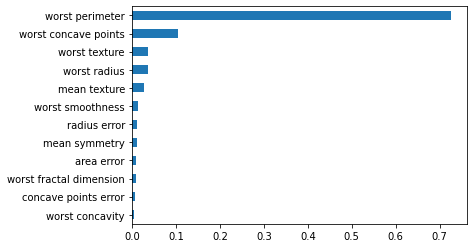

In [61]:
import pandas as pd
# Series.plot(kind='barh')를 사용하여 그래프로 표시한다
s.plot(kind='barh')
plt.show()

### Regression Tree 

#### 보스턴 주택 가격 예측

In [62]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.to_csv('boston.csv', index=False)

In [63]:
import pandas as pd
boston = pd.read_csv('boston.csv')
X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]
X.shape, y.shape

((506, 13), (506,))

In [64]:
from sklearn.model_selection import train_test_split

# boston의 입력(data), 출력(target) 을 train, test로 분리한다.
# random_state = 0 사용
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeRegressor
# train 데이터를 DecisionTreeRegressor로 학습하여 model을 생성한다
# random_state=0을 사용한다
# model의 성능을 평가한다 (train, test)
model = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6125205090458208)

In [66]:
# 학습된 모델에서 어떤 특성이 중요한지 조회하여 본다
model.feature_importances_

array([3.21492975e-02, 2.49367332e-04, 1.08502028e-02, 3.18726245e-04,
       1.94043753e-02, 2.44382861e-01, 5.75148555e-03, 5.02555750e-02,
       3.11827219e-03, 8.75882350e-03, 3.05312978e-02, 7.03845887e-03,
       5.87191256e-01])

In [67]:
# tree의 깊이 조회
model.get_depth()

18

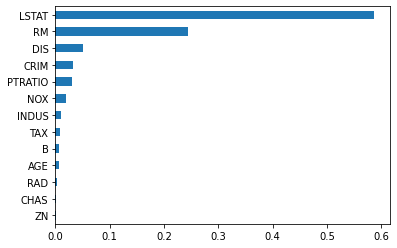

In [68]:
import pandas as pd
s = pd.Series(model.feature_importances_, X.columns)
s = s[s>0].sort_values()
s.plot(kind='barh')
plt.show()

In [69]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
                feature_names=X.columns,
                impurity=True, 
                filled=True)
# tree_model.dot 시각화 사이트# http://webgraphviz.com/
# model.dot 파일을 메모장 등으로 열어서 웹에 복사한다

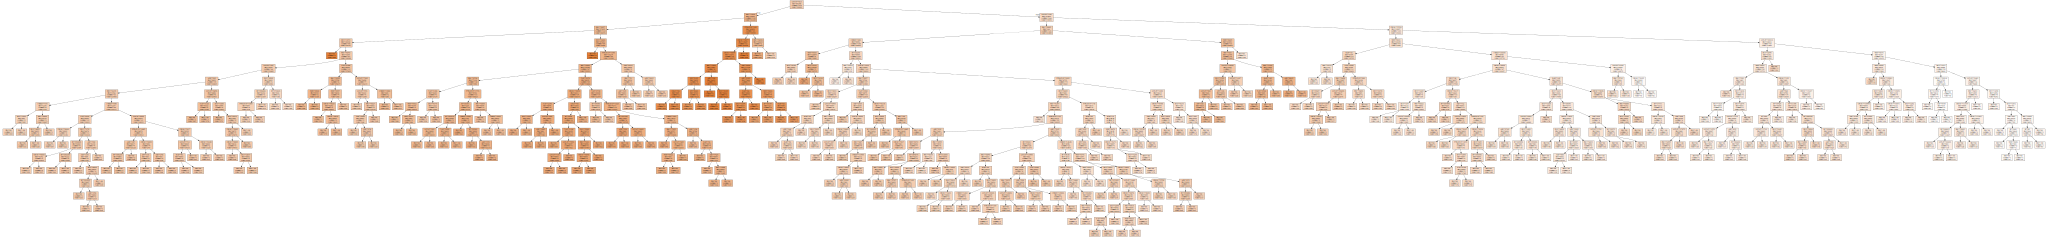

In [70]:
# Tree가 깊고 복잡함
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)

In [71]:
# max_depth=5를 사용해 본다
from sklearn.tree import DecisionTreeRegressor
model5 = DecisionTreeRegressor(max_depth=5, random_state=0).fit(x_train, y_train)
model5.score(x_train, y_train), model5.score(x_test, y_test)

(0.9292057173968848, 0.6727480725849063)

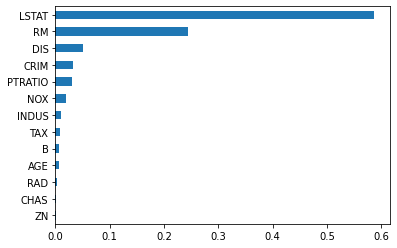

In [72]:
import pandas as pd
s = pd.Series(model.feature_importances_, X.columns)
s = s[s>0].sort_values()
s.plot(kind='barh')
plt.show()